In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
train_df = pd.read_csv("../birdclef-2025/train.csv")
train_df.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0


In [6]:
taxonomy_df = pd.read_csv("../birdclef-2025/taxonomy.csv")
taxonomy_df.head()

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta


In [7]:
all_names = taxonomy_df["common_name"]
print(f"Number of common names: {len(all_names)}")


Number of common names: 206


In [8]:
names_train = train_df["common_name"]
names_train_unique = names_train.unique()
print(f"Number of unique common names in train: {len(names_train_unique)}")

Number of unique common names in train: 207


In [9]:
val_counts = names_train.value_counts()
val_counts

common_name
Great Kiskadee                     990
Common Pauraque                    808
Tropical Kingbird                  787
Roadside Hawk                      709
Bananaquit                         610
                                  ... 
Colombian Plump Frog                 2
Brown-throated Three-toed Sloth      2
Collared Peccary                     2
Crab-eating Fox                      2
Ragoniella pulchella                 2
Name: count, Length: 206, dtype: int64

<Axes: title={'center': 'Number of train samples per common name'}, xlabel='common_name'>

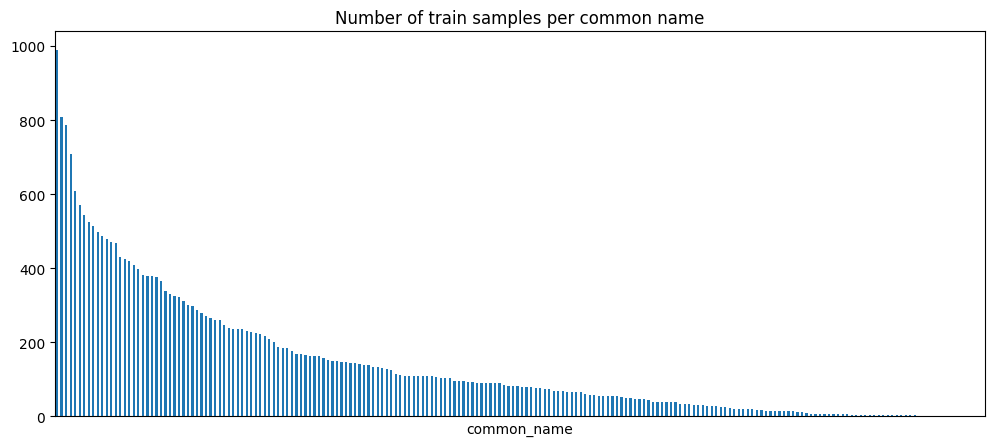

In [10]:
names_train.value_counts().plot(kind="bar", figsize=(12, 5), title="Number of train samples per common name", xticks=[])

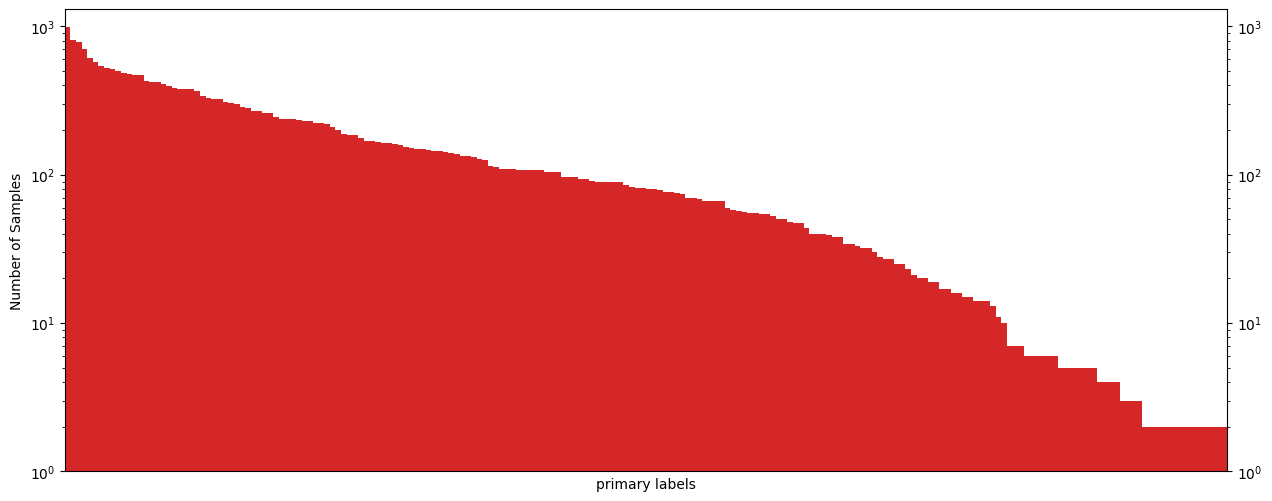

In [11]:
counts = val_counts.values
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(15, 6))
plt.bar(range(len(counts)), counts, width=1, color="tab:red")
plt.xlim(-0.5, len(counts)-0.5)
plt.yscale("log")
plt.xticks([])
plt.xlabel("primary labels")
plt.ylabel("Number of Samples")
plt.ylim(1,10e2+300)
plt.tick_params(labeltop=False, labelright=True, which ="both", right=True)


In [12]:
primary_labels = train_df["primary_label"]
primary_labels_unique = primary_labels.unique()
print(f"Number of unique primary labels in train: {len(primary_labels_unique)}")

Number of unique primary labels in train: 206


In [13]:
secondary_labels = train_df["secondary_labels"]
all_secondary_labels = []
for labels in secondary_labels:
    if labels != "['']":
        labels = labels.replace("'", "").replace("[", "").replace("]", "")
        all_secondary_labels.extend(labels.split(", "))
all_secondary_labels = pd.Series(all_secondary_labels)
all_secondary_labels.drop(all_secondary_labels[all_secondary_labels==''].keys(), inplace=True)
secondary_labels_unique = pd.Series(all_secondary_labels.unique())
print(f"Number of unique secondary labels in train: {len(secondary_labels_unique)}")

Number of unique secondary labels in train: 132


In [14]:
primary_labels_grouped = primary_labels.groupby(primary_labels).count().sort_values(ascending=False)
secondary_labels_grouped = all_secondary_labels.groupby(all_secondary_labels).count().sort_values(ascending=False)
secondary_labels_grouped.name = "secondary_labels"
len(secondary_labels_grouped)

132

In [15]:
merged_label_counts = pd.merge(primary_labels_grouped, secondary_labels_grouped, how="left", left_index=True, right_index=True)
merged_label_counts

,primary_label,secondary_labels
primary_label,,
grekis,990,489.0
compau,808,44.0
trokin,787,188.0
roahaw,709,2.0
banana,610,104.0
...,...,...
66531,2,NaN
67082,2,NaN
81930,2,NaN


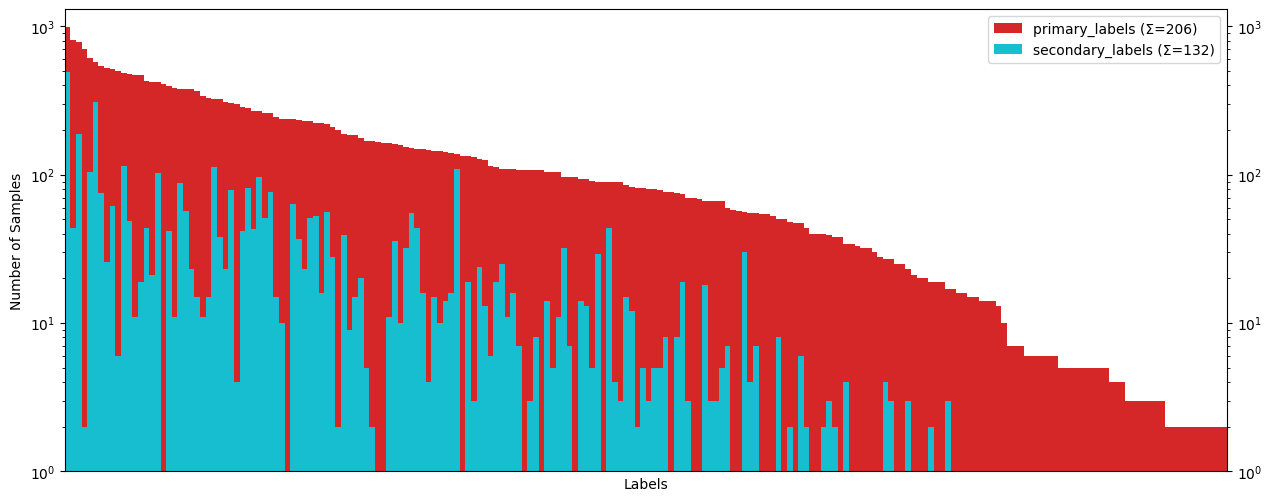

In [16]:
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(15, 6))
plt.bar(range(len(primary_labels_grouped)), merged_label_counts["primary_label"], width=1, color="tab:red", label=f"primary_labels (Σ={len(primary_labels_grouped)})")
plt.bar(range(len(primary_labels_grouped)), merged_label_counts["secondary_labels"], width=1, color="tab:cyan", label=f"secondary_labels (Σ={len(secondary_labels_grouped)})")
plt.xlim(-0.5, len(counts)-0.5)
plt.yscale("log")
plt.xticks([])
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
plt.ylim(1,10e2+300)
plt.tick_params(labeltop=False, labelright=True, which ="both", right=True)
plt.legend(loc="upper right")
plt.text
plt.savefig("scarcity_plot.png", dpi=300, bbox_inches='tight')


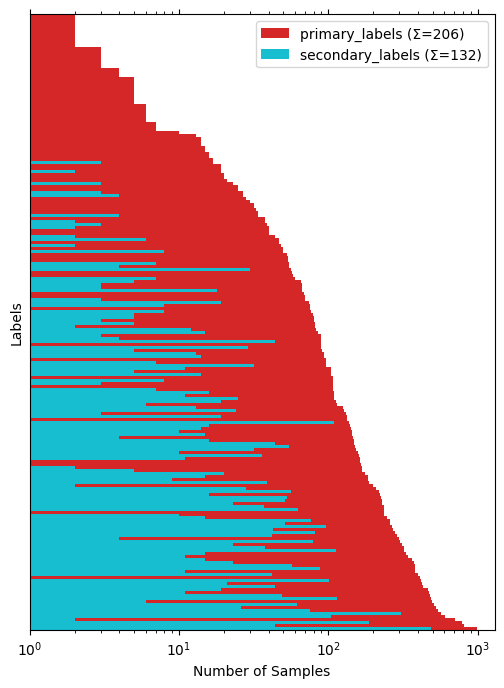

In [69]:
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6, 8))  # Swapped dimensions for horizontal orientation
plt.barh(range(len(primary_labels_grouped)), merged_label_counts["primary_label"], height=1, color="tab:red", label=f"primary_labels (Σ={len(primary_labels_grouped)})")
plt.barh(range(len(primary_labels_grouped)), merged_label_counts["secondary_labels"], height=1, color="tab:cyan", label=f"secondary_labels (Σ={len(secondary_labels_grouped)})")
plt.ylim(-0.5, len(counts)-0.5)  # Changed from xlim to ylim
plt.xscale("log")  # Changed from yscale to xscale
plt.yticks([])  # Changed from xticks to yticks
plt.ylabel("Labels")  # Swapped labels
plt.xlabel("Number of Samples")
plt.xlim(1,10e2+300)  # Changed from ylim to xlim
plt.tick_params(labeltop=False, labelright=False, which="both", top=True)  # Adjusted tick parameters
plt.legend(loc="upper right")
plt.savefig("scarcity_plot_horizontal.png", dpi=300, bbox_inches='tight')

In [61]:
# Now we add the pseudo-labels
import sys
sys.path.insert(1, "../")
from label_loading import load_pseudolabels

class CFG:
    seed = 2025
    normalize_labels = False
    debug = False
    stratified_pseudolabels = False
    max_pseudolabels = 1000000000 # make sure we get all the pseudolabels
    pseudolabels_path = "../pseudolabels_even_better.csv"
    train_soundscapes = "../birdclef-2025/train_soundscapes"
    pseudolabel_confidence_threshold = 0.2

cfg = CFG()

pseudodf = pd.read_csv(cfg.pseudolabels_path)
pseudo_labels = load_pseudolabels(pseudodf, cfg)
pseudo_labels.head()

Found 104530 samples with confidence > 0.2
Using randomly selected 1000000000 pseudolabels that pass confidence threshold


,samplename,filename,timestamp,primary_label,secondary_labels,filepath
0,H22_20230520_002000_15,H22_20230520_002000.ogg,15,turvul,[],../birdclef-2025/train_soundscapes\H22_2023052...
1,H98_20230430_112500_15,H98_20230430_112500.ogg,15,thlsch3,"[21211, blbwre1]",../birdclef-2025/train_soundscapes\H98_2023043...
2,H74_20230502_100500_55,H74_20230502_100500.ogg,55,whbman1,[gohman1],../birdclef-2025/train_soundscapes\H74_2023050...
3,H17_20230509_101500_25,H17_20230509_101500.ogg,25,thlsch3,[],../birdclef-2025/train_soundscapes\H17_2023050...
4,H91_20230513_034000_10,H91_20230513_034000.ogg,10,135045,[],../birdclef-2025/train_soundscapes\H91_2023051...


In [62]:
print(f"Total pseudo-labels = {len(pseudo_labels)}")
primary_pslabels = pseudo_labels["primary_label"]
primary_pslabels_unique = primary_pslabels.unique()
print(f"Number of unique primary pseudolabels: {len(primary_pslabels_unique)}")

Total pseudo-labels = 104530
Number of unique primary pseudolabels: 194


In [63]:
secondary_pslabels = pseudo_labels["secondary_labels"]
all_secondary_pslabels = []
for labels in secondary_pslabels:
    if labels not in [[''], None, [], "['']", "[]"]:
        all_secondary_pslabels.extend(labels)
all_secondary_pslabels = pd.Series(all_secondary_pslabels)
all_secondary_pslabels.drop(all_secondary_pslabels[all_secondary_pslabels==''].keys(), inplace=True)
secondary_pslabels_unique = pd.Series(all_secondary_pslabels.unique())
print(f"Number of unique secondary pseudo-labels: {len(secondary_pslabels_unique)}")

Number of unique secondary pseudo-labels: 196


In [64]:
primary_pslabels_grouped = primary_pslabels.groupby(primary_pslabels).count().sort_values(ascending=False)
secondary_pslabels_grouped = all_secondary_pslabels.groupby(all_secondary_pslabels).count().sort_values(ascending=False)
secondary_pslabels_grouped.name = "secondary_labels"
all_merged_label_counts = pd.merge(primary_labels_grouped, secondary_labels_grouped, how="left", left_index=True, right_index=True)
all_merged_label_counts = pd.merge(all_merged_label_counts, primary_pslabels_grouped, how="left", left_index=True, right_index=True, suffixes=('', '_pseudo'))
all_merged_label_counts = pd.merge(all_merged_label_counts, secondary_pslabels_grouped, how="left", left_index=True, right_index=True, suffixes=('', '_pseudo'))  
all_merged_label_counts

,primary_label,secondary_labels,primary_label_pseudo,secondary_labels_pseudo
primary_label,,,,
grekis,990,489.0,542.0,749.0
compau,808,44.0,75.0,227.0
trokin,787,188.0,270.0,553.0
roahaw,709,2.0,143.0,220.0
banana,610,104.0,288.0,373.0
...,...,...,...,...
66531,2,NaN,2.0,2.0
67082,2,NaN,NaN,NaN
81930,2,NaN,NaN,NaN


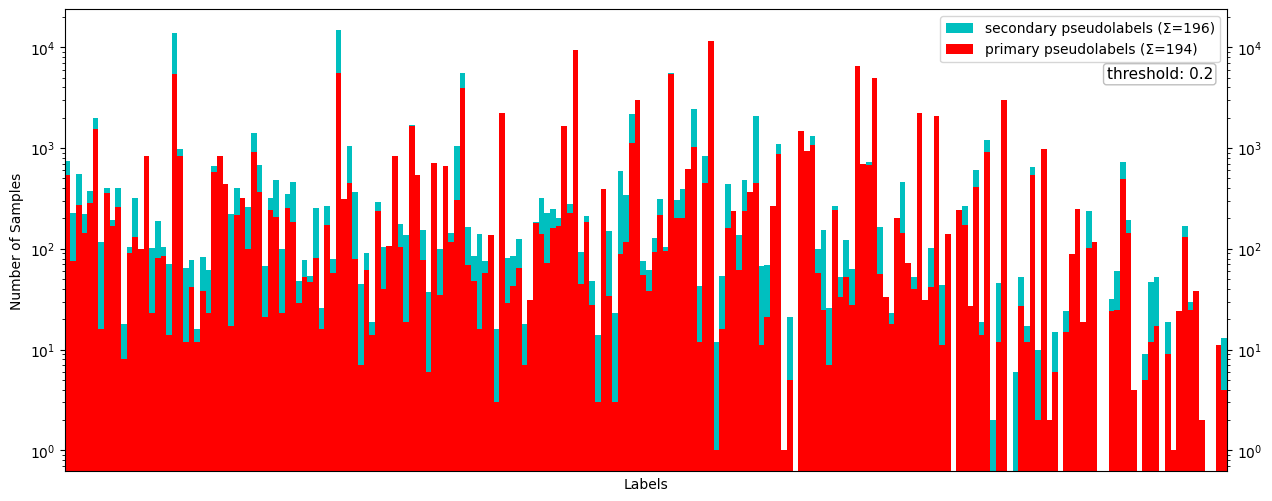

In [ ]:
plt.figure(figsize=(15, 6))

plt.bar(range(len(primary_labels_grouped)), all_merged_label_counts["secondary_labels_pseudo"], width=1, color="c", label=f"secondary pseudolabels (Σ={len(secondary_pslabels_grouped)})", alpha=1)
plt.bar(range(len(primary_labels_grouped)), all_merged_label_counts["primary_label_pseudo"], width=1, color="r", label=f"primary pseudolabels (Σ={len(primary_pslabels_grouped)})", alpha=1)

plt.xlim(-0.5, len(counts)-0.5)
plt.yscale("log")
plt.xticks([])
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
#plt.ylim(1,10e2+300)
plt.tick_params(labeltop=False, labelright=True, which ="both", right=True)
plt.legend(loc="upper right")
plt.text(0.942, 0.85, f"threshold: {cfg.pseudolabel_confidence_threshold}", transform=plt.gca().transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey', boxstyle='round,pad=0.2'))
plt.savefig(f"scarcity_plot_pseudo_thr{cfg.pseudolabel_confidence_threshold}.png", dpi=300)

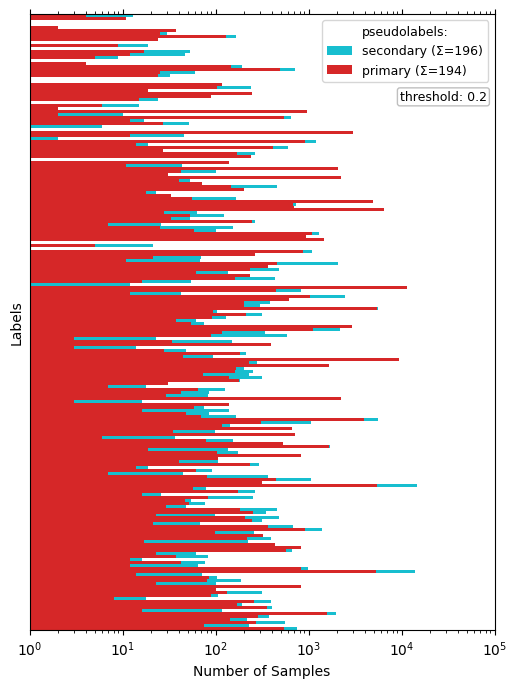

In [65]:
plt.figure(figsize=(6, 8))

plt.barh(range(len(primary_labels_grouped)), all_merged_label_counts["secondary_labels_pseudo"], height=1, color="tab:cyan", label=f"secondary (Σ={len(secondary_pslabels_grouped)})", alpha=1)
plt.barh(range(len(primary_labels_grouped)), all_merged_label_counts["primary_label_pseudo"], height=1, color="tab:red", label=f"primary (Σ={len(primary_pslabels_grouped)})", alpha=1)

plt.ylim(-0.5, len(counts)-0.5)
plt.xscale("log")
plt.xlim(1, 10e4)
plt.yticks([])
plt.ylabel("Labels")
plt.xlabel("Number of Samples")
plt.tick_params(labeltop=False, labelright=False, which ="both", top=True)
plt.legend(loc="upper right", title="pseudolabels:", fontsize=9, title_fontsize=9)
plt.text(0.89, 0.86, f"threshold: {cfg.pseudolabel_confidence_threshold}", transform=plt.gca().transAxes, ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='grey', boxstyle='round,pad=0.2'))
plt.savefig(f"scarcity_plot_pseudo_thr{cfg.pseudolabel_confidence_threshold}.png", dpi=300, bbox_inches='tight')